# Downloading SAMOS data from MarineFlux ERDDAP server

In [6]:
%pip install erddapy
%pip install cf_xarray
%pip install netCDF4
%pip install cartopy

from erddapy import ERDDAP
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import numpy.ma as ma
import cf_xarray

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Create the ERDDAP request

In [7]:
flux_algorithms = ["S88", "B23", "C36"]
extent = [280.0, 300.0, 30.0, 45.0] # [lon-, lon+, lat-, lat+]
start_time = "2015-11-01T00:00:00Z"
end_time = "2015-12-01T00:00:00Z"

In [8]:
erddap_samos = dict()
for algo in flux_algorithms:
  erddap_samos[algo] = ERDDAP(
    server="http://marineflux-erddap.coaps.fsu.edu/erddap",
    protocol="tabledap",
  )

  erddap_samos[algo].dataset_id = f"SAMOS_Fluxes_{algo}"
  erddap_samos[algo].constraints = {
      "time>=": start_time,
      "time<=": end_time,
      "longitude>=": extent[0],
      "longitude<=": extent[1],
      "latitude>=": extent[2],
      "latitude<=": extent[3],
  }
  erddap_samos[algo].variables = [
      "platform_call_sign",
      "platform_name",
      "lhf",
      "lhf_qc",
      "shf",
      "shf_qc",
      "tau",
      "tau_qc"
  ]

### URLs for ERDDAP request can be retrieved

In [9]:
for algo in flux_algorithms:
    erddap_samos[algo].response = "csv"
    print(f'Download {algo} CSV: {erddap_samos[algo].get_download_url()}')

    erddap_samos[algo].response = "html"
    print(f'View {algo} download form on ERDDAP server: {erddap_samos[algo].get_download_url()}\n')

Download S88 CSV: http://marineflux-erddap.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_S88.csv?platform_call_sign,platform_name,lhf,lhf_qc,shf,shf_qc,tau,tau_qc&time>=1446336000.0&time<=1448928000.0&longitude>=280.0&longitude<=300.0&latitude>=30.0&latitude<=45.0
View S88 download form on ERDDAP server: http://marineflux-erddap.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_S88.html?platform_call_sign,platform_name,lhf,lhf_qc,shf,shf_qc,tau,tau_qc&time>=1446336000.0&time<=1448928000.0&longitude>=280.0&longitude<=300.0&latitude>=30.0&latitude<=45.0

Download B23 CSV: http://marineflux-erddap.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_B23.csv?platform_call_sign,platform_name,lhf,lhf_qc,shf,shf_qc,tau,tau_qc&time>=1446336000.0&time<=1448928000.0&longitude>=280.0&longitude<=300.0&latitude>=30.0&latitude<=45.0
View B23 download form on ERDDAP server: http://marineflux-erddap.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_B23.html?platform_call_sign,platform_name,lhf,lhf_qc,shf,shf_qc,tau,tau_qc&time>

### Request data as CF compliant netCDF4-python object

In [10]:
nc = dict()

for algo in flux_algorithms:
    nc[algo] = erddap_samos[algo].to_ncCF()

    print(nc[algo])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    acknowledgement: NOAA/CPO/COM via award NA21OAR4310262
    cdm_data_type: Point
    comment: These data are all of the input variables and the relevant output variables of bulk flux calculations done on ship observations. When redundant instruments exist, the sensors used for calculations are chosen based on the amount of good data available, determined on a per day basis, using an updated method of the one described in Smith, S. R., N. Lopez, and M. A. Bourassa, 2016: SAMOS air-sea fluxes: 2005–2014. Geoscience Data Journal, 3, 9–19, https://doi.org/10.1002/gdj3.34.
    Conventions: COARDS, CF-1.6, ACDD-1.3
    creator_name: Marine Data Center, Center for Ocean-Atmospheric Prediction Studies, Florida State University, Tallahassee, FL, 32306-2840, USA
    creator_type: institution
    creator_url: https://mdc.coaps.fsu.edu/
    date_created: 2025-03-19 22:24:11.904122+00:00
    date_mod

## Request data as pandas DataFrame

In [11]:
df = dict()

for algo in flux_algorithms:
    df[algo] = erddap_samos[algo].to_pandas()

    print(df[algo])

      platform_call_sign     platform_name  lhf (watts meter-2)  lhf_qc  \
0                   KAQP          Atlantis           114.428518     1.0   
1                   KAQP          Atlantis           110.135023     1.0   
2                   KAQP          Atlantis           102.937589     1.0   
3                   KAQP          Atlantis           116.364294     1.0   
4                   KAQP          Atlantis           109.863191     1.0   
...                  ...               ...                  ...     ...   
80739               KAQP          Atlantis           126.275118     1.0   
80740               KAQP          Atlantis           121.318888     1.0   
80741               KAQP          Atlantis           140.292026     1.0   
80742               KAQP          Atlantis           116.640051     1.0   
80743               WTEA  Thomas Jefferson            16.637059     1.0   

       shf (watts meter-2)  shf_qc  tau (newton meter-2)  tau_qc  
0                30.017785     1

## Request data as xarray Dataset

In [12]:
ds = dict()

for algo in flux_algorithms:
    ds[algo] = erddap_samos[algo].to_xarray(requests_kwargs={"timeout": 600})

    print(ds[algo])

<xarray.Dataset> Size: 6MB
Dimensions:             (row: 80744)
Coordinates:
    longitude           (row) float32 323kB ...
    latitude            (row) float32 323kB ...
    time                (row) datetime64[ns] 646kB ...
Dimensions without coordinates: row
Data variables:
    platform_call_sign  (row) object 646kB ...
    platform_name       (row) object 646kB ...
    lhf                 (row) float64 646kB ...
    lhf_qc              (row) float64 646kB ...
    shf                 (row) float64 646kB ...
    shf_qc              (row) float64 646kB ...
    tau                 (row) float64 646kB ...
    tau_qc              (row) float64 646kB ...
Attributes: (12/62)
    acknowledgement:           NOAA/CPO/COM via award NA21OAR4310262
    cdm_data_type:             Point
    comment:                   These data are all of the input variables and ...
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    creator_name:              Marine Data Center, Center for Ocean-Atmosph

### Show which vessels are present in this subset

In [13]:
print('\n'.join(map(str,list(set(zip(ds['C36']['platform_name'].data,ds['C36']['platform_call_sign'].data))))))

('Thomas Jefferson', 'WTEA')
('Henry B. Bigelow', 'WTDF')
('Atlantis', 'KAQP')
('Gordon Gunter', 'WTEO')
('Atlantic Explorer', 'WDC9417')


### Filter out data not flagged as "good"

In [14]:
vars = ['lhf', 'shf', 'tau']

for var in vars:
    
    for algo in flux_algorithms:

        if f'{var}_qc' in ds[algo]:
            good_indices = np.where((ds[algo][f'{var}_qc'].cf == 'good') == True)[0]
            mask = np.zeros(len(ds[algo][f'{var}'].data), dtype=bool)
            mask[good_indices] = True
            ds[algo][var].data[~mask] = np.nan
        

### Latent heat flux plotted as a function of time

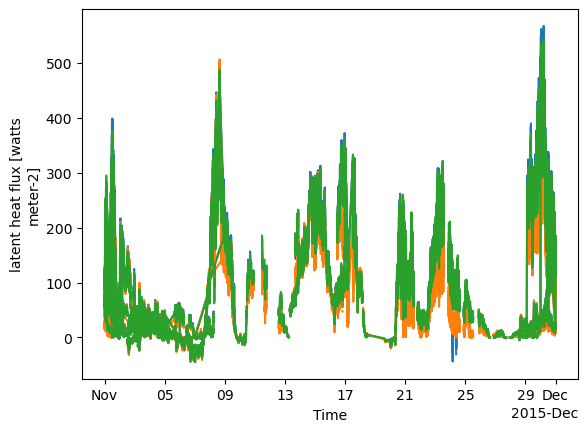

In [15]:
for algo in flux_algorithms:
    ds[algo]['lhf'].plot(x='time')

### Sensible and latent heat fluxes plotted on a map

In [16]:
def plot_shared_colorbar(dataset, vars, cmap='bwr', diverging=True, sort=False):
    height = 4
    figsize = (len(vars) * height, height)
    fig = plt.figure(figsize=figsize, layout='constrained')
    fig.suptitle(dataset.title)

    projection = ccrs.PlateCarree()

    ax_dict = fig.subplot_mosaic(
        [
            vars,
            ['cbar' for var in vars]
        ],
        height_ratios=[20, 1],
        per_subplot_kw={
            tuple(vars): {'projection': projection}
        }
    )

    vmax = -1
    for var in vars:
        ax_dict[var].set_extent(extent, crs=projection)
        ax_dict[var].stock_img()
        ax_dict[var].coastlines()
        ax_dict[var].set_title(f'{dataset[var].long_name} ({dataset[var].units})')

        vmax = max(vmax, ma.max(abs(ma.masked_invalid(ds[algo][var]))))

    if diverging:
        vmin = -vmax
    else:
        vmin = 0

    scatter = []
    for var in vars:
        # sorting the DataArray before plotting makes the higher values show up on top. this is useful for seeing where the high values are, but obscures the negative values.
        if sort:
            da = dataset[var].sortby(dataset[var])
        else:
            da = dataset[var]
        scatter.append(ax_dict[var].scatter(x=da['longitude'], y=da['latitude'], c=da, cmap=cmap, vmin=vmin, vmax=vmax))

    cbar = plt.colorbar(scatter[0], cax=ax_dict['cbar'], orientation='horizontal')

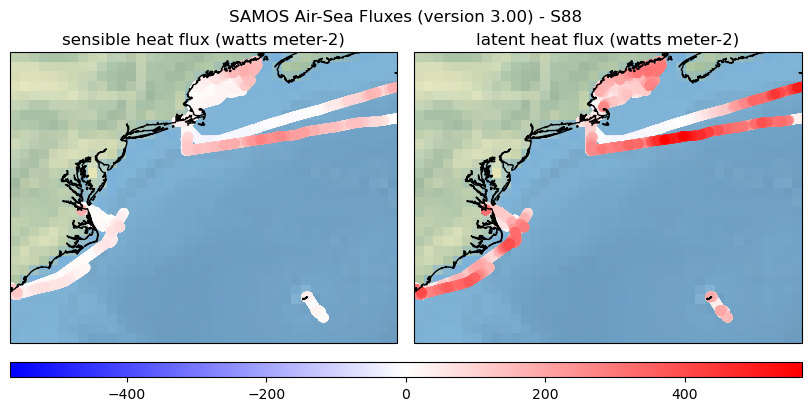

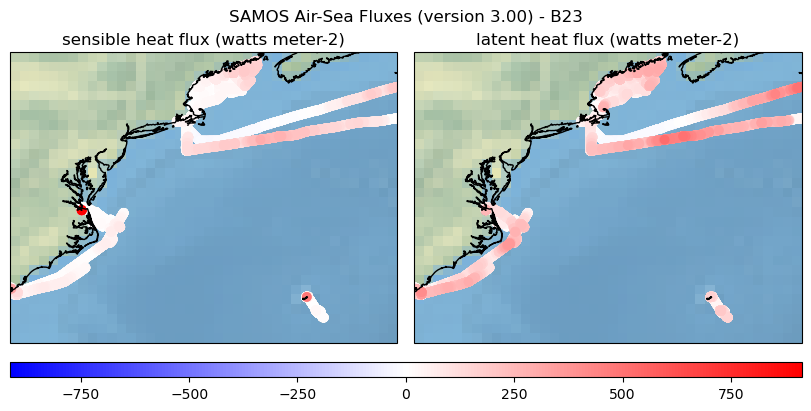

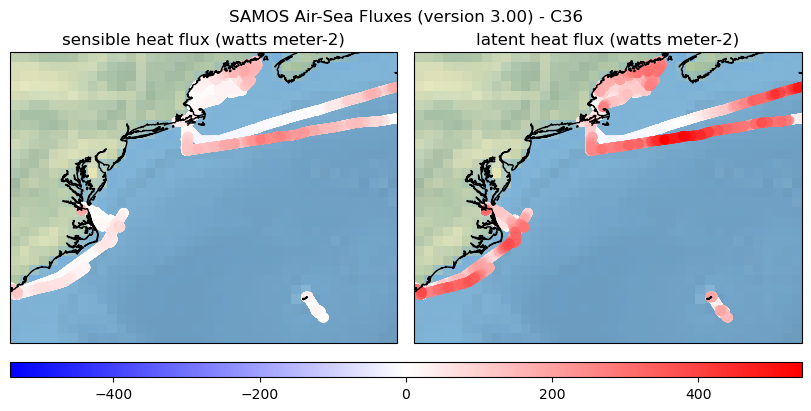

In [17]:
for algo in flux_algorithms:
    plot_shared_colorbar(ds[algo], ['shf', 'lhf'], sort=True)

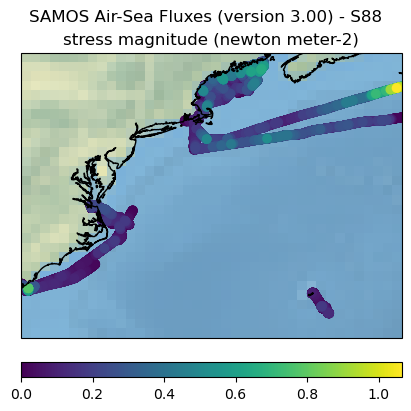

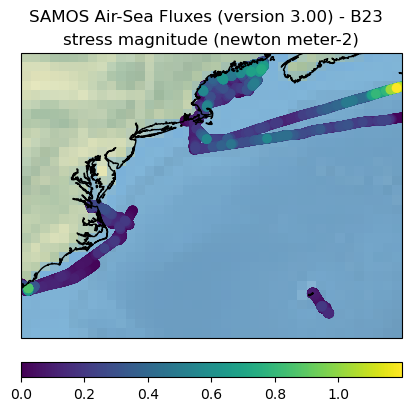

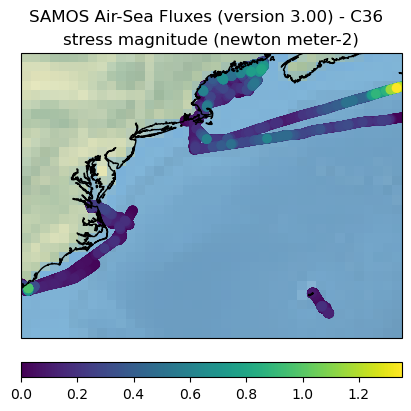

In [18]:
for algo in flux_algorithms:
    plot_shared_colorbar(ds[algo], ['tau'], cmap='viridis', diverging=False, sort=True)

In [19]:
def plot_dataset_comparison(datasets, var, sort=False, cmap='bwr', diverging=True):
    keys = list(datasets.keys())
    height = 4
    figsize = (len(datasets) * height, height)
    fig = plt.figure(figsize=figsize, layout='constrained')
    fig.suptitle(f'{ds[keys[0]][var].long_name} ({ds[keys[0]][var].units})')

    projection = ccrs.PlateCarree()

    ax_dict = fig.subplot_mosaic(
        [
            [algo for algo in keys],
            ['cbar' for algo in keys]
        ],
        height_ratios=[20, 1],
        per_subplot_kw={
            tuple(algo for algo in keys): {'projection': projection}
        }
    )

    vmax = -1
    for algo in keys:
            
        ax_dict[algo].set_extent(extent, crs=projection)
        ax_dict[algo].stock_img()
        ax_dict[algo].coastlines()
        ax_dict[algo].set_title(f'{datasets[algo][var].long_name} ({datasets[algo][var].units})')

        vmax = max(vmax, ma.max(abs(ma.masked_invalid(datasets[algo][var]))))

        ax_dict[algo].set_title(datasets[algo].title)

    if diverging:
        vmin = -vmax
    else:
        vmin = 0

    scatter = []
    for algo in keys:
        # sorting the DataArray before plotting makes the higher values show up on top. this is useful for seeing where the high values are, but obscures the negative values.
        if sort:
            da = datasets[algo][var].sortby(datasets[algo][var])
        else:
            da = datasets[algo][var]
        scatter.append(ax_dict[algo].scatter(x=da['longitude'], y=da['latitude'], c=da, cmap=cmap, vmin=vmin, vmax=vmax))

    cbar = plt.colorbar(scatter[0], cax=ax_dict['cbar'], orientation='horizontal')

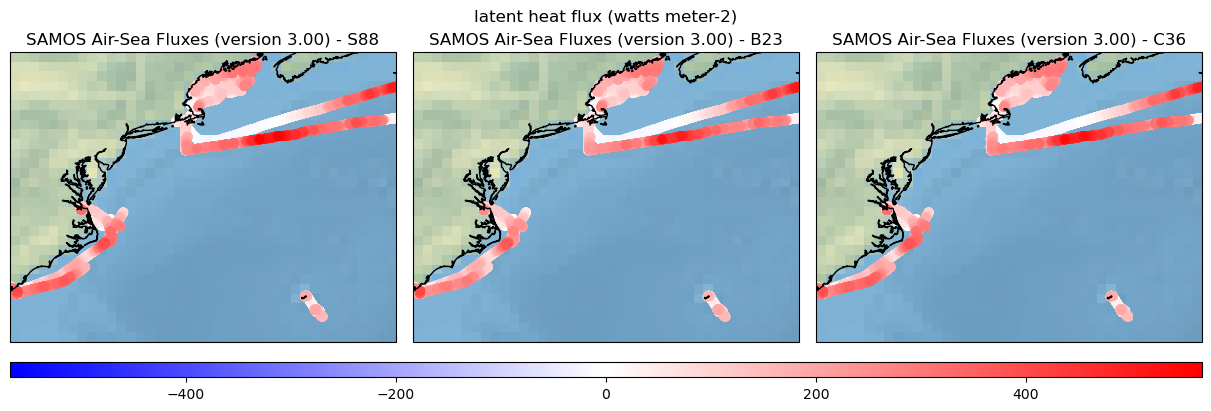

In [20]:
plot_dataset_comparison(ds, 'lhf', sort=True)

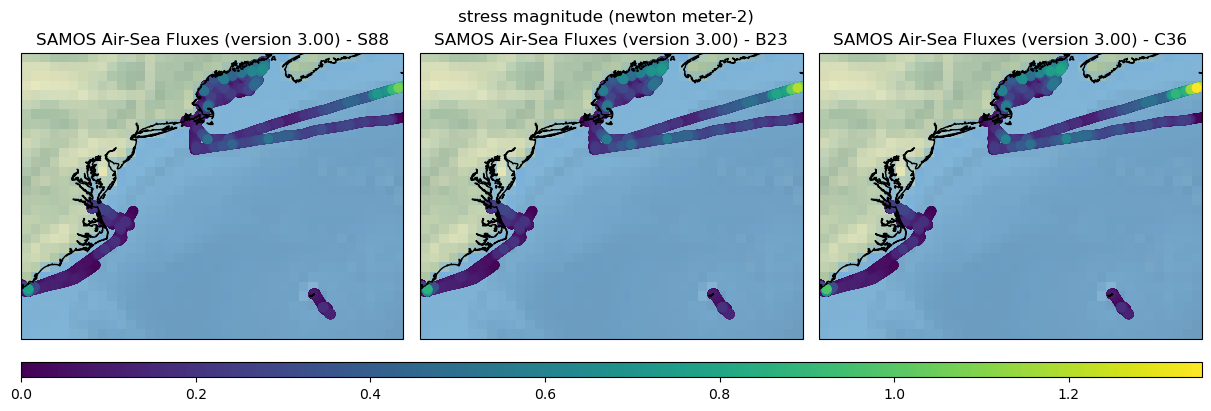

In [21]:
plot_dataset_comparison(ds, 'tau', cmap='viridis', diverging=False, sort=True)